# Monopoly analysis

## Imports

In [1]:
import monopoly
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize

## Simulate the game

In [2]:
visits = monopoly.run()

In [3]:
# Simulation stats
print(f"Simulated {monopoly.GAMES:,} games. Each game had {monopoly.PLAYERS} players and lasted {monopoly.DIE_ROLLS_PER_GAME} turns.")
print(f"Total of {monopoly.GAMES*monopoly.DIE_ROLLS_PER_GAME*monopoly.PLAYERS:,} die rolls simulated.")

Simulated 10,000 games. Each game had 4 players and lasted 30 turns.
Total of 1,200,000 die rolls simulated.


## Analysis

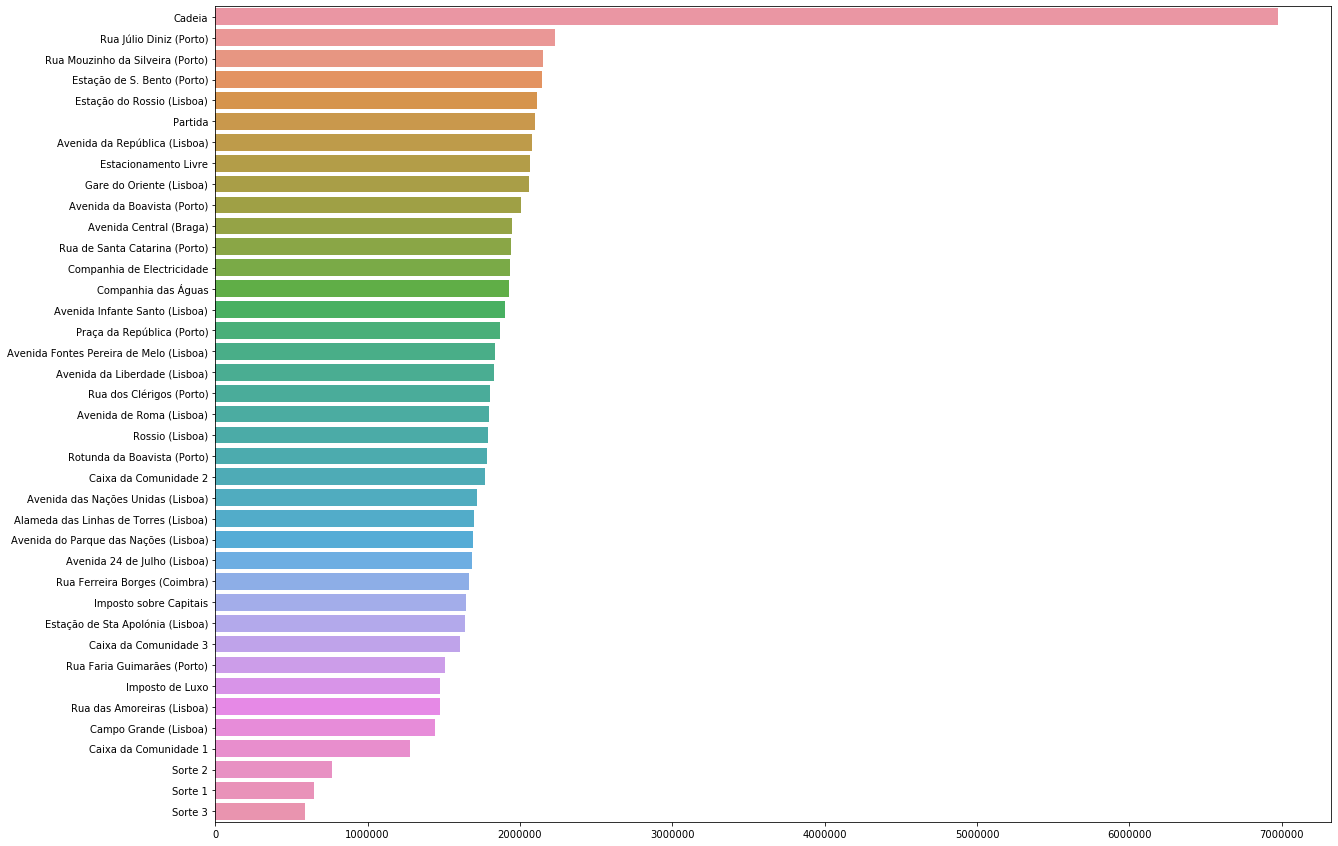

In [4]:

# Counts of each space in the board
series = pd.Series(data=visits)

counts = series.value_counts()

figsize(20, 15)
ax = sns.barplot(x=counts, y=counts.index)

In [5]:
# Create a ditionary of the colors of each space
spaces = monopoly.Board.SPACES
spaces_colors = {sp['name']: sp['color'] for sp in spaces}

In [6]:
# Calculate frequencies (%)
df = pd.DataFrame(counts, columns=['counts'])
df['probability'] = df['counts']/df['counts'].sum()*100

# Get colors of each space
def get_color(row):
    return spaces_colors[row.name]

df['color'] = df.apply(lambda row: get_color(row), axis=1)

df

,counts,probability,color
Cadeia,6975788,9.608523,#CCE5D2
Rua Júlio Diniz (Porto),2228566,3.069650,#E2000D
Rua Mouzinho da Silveira (Porto),2149893,2.961285,#F39000
Estação de S. Bento (Porto),2147114,2.957457,#C2C7CA
Estação do Rossio (Lisboa),2111237,2.908040,#C2C7CA
Partida,2098563,2.890583,#CCE5D2
Avenida da República (Lisboa),2081337,2.866855,#F39000
Estacionamento Livre,2063334,2.842058,#CCE5D2
Gare do Oriente (Lisboa),2058105,2.834855,#C2C7CA
Avenida da Boavista (Porto),2008038,2.765893,#F39000


### Probability of ending in each space

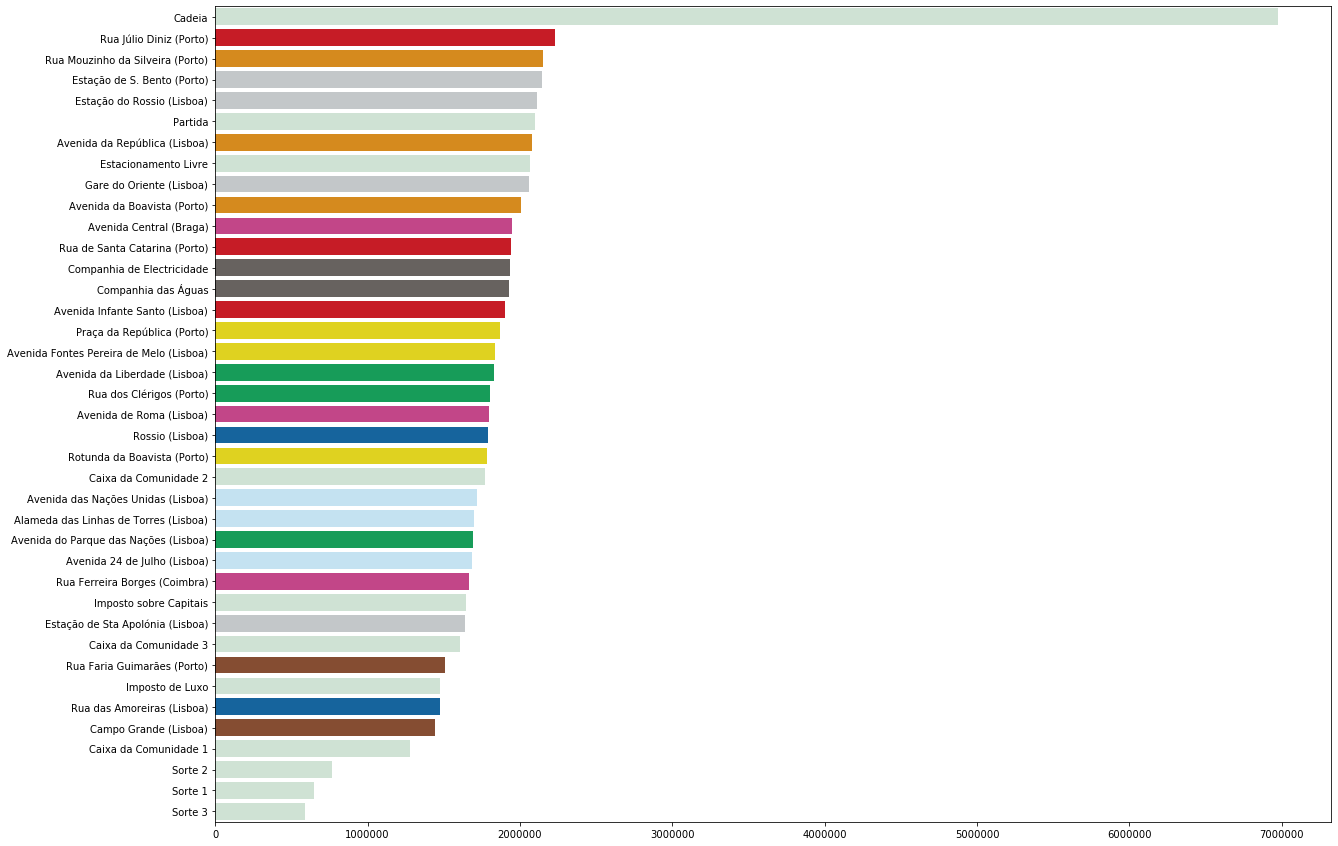

In [7]:
figsize(20, 15)
ax = sns.barplot(x=counts, y=df.index, data=df, palette=df['color'])

### Value of each space on the base rent

In [75]:
spaces_rents = {sp['name']: sp['rent'] for sp in spaces}

df_rents = df.reset_index().rename(columns={'index': 'space', 'probability': 'prob'})
df_rents['rent'] = df_rents['space'].map(spaces_rents)
df_rents.dropna(axis=0, inplace=True)
df_rents = df_rents.groupby('color').sum()

for t in range(4, 60, 4):
    df_rents[t] = df_rents['prob']/100 * t * df_rents['rent']

df_rents = df_rents.drop(columns=['prob', 'rent', 'counts'])
df_rents = df_rents.transpose()
#df_rents.reset_index(inplace=True)
df_rents

color,#0068B3,#01B259,#68625E,#934824,#BCE4F9,#C2C7CA,#D73189,#E2000D,#F39000,#FFED00
4,15.288175,23.461020,10.218515,0.975698,5.619787,43.839223,9.543550,18.744413,15.125498,20.574271
8,30.576350,46.922041,20.437030,1.951396,11.239575,87.678446,19.087099,37.488825,30.250996,41.148542
12,45.864525,70.383061,30.655545,2.927095,16.859362,131.517669,28.630649,56.233238,45.376495,61.722813
16,61.152700,93.844082,40.874060,3.902793,22.479149,175.356893,38.174198,74.977650,60.501993,82.297084
20,76.440875,117.305102,51.092575,4.878491,28.098937,219.196116,47.717748,93.722063,75.627491,102.871355
24,91.729050,140.766122,61.311090,5.854189,33.718724,263.035339,57.261297,112.466475,90.752989,123.445626
28,107.017225,164.227143,71.529605,6.829887,39.338511,306.874562,66.804847,131.210888,105.878487,144.019898
32,122.305399,187.688163,81.748120,7.805585,44.958299,350.713785,76.348396,149.955300,121.003985,164.594169
36,137.593574,211.149183,91.966635,8.781284,50.578086,394.553008,85.891946,168.699713,136.129484,185.168440
40,152.881749,234.610204,102.185150,9.756982,56.197873,438.392231,95.435495,187.444126,151.254982,205.742711


In [76]:
df_rents.reset_index(level=0, inplace=True)
df_rents = df_rents.rename(columns={'index': 'turn'})

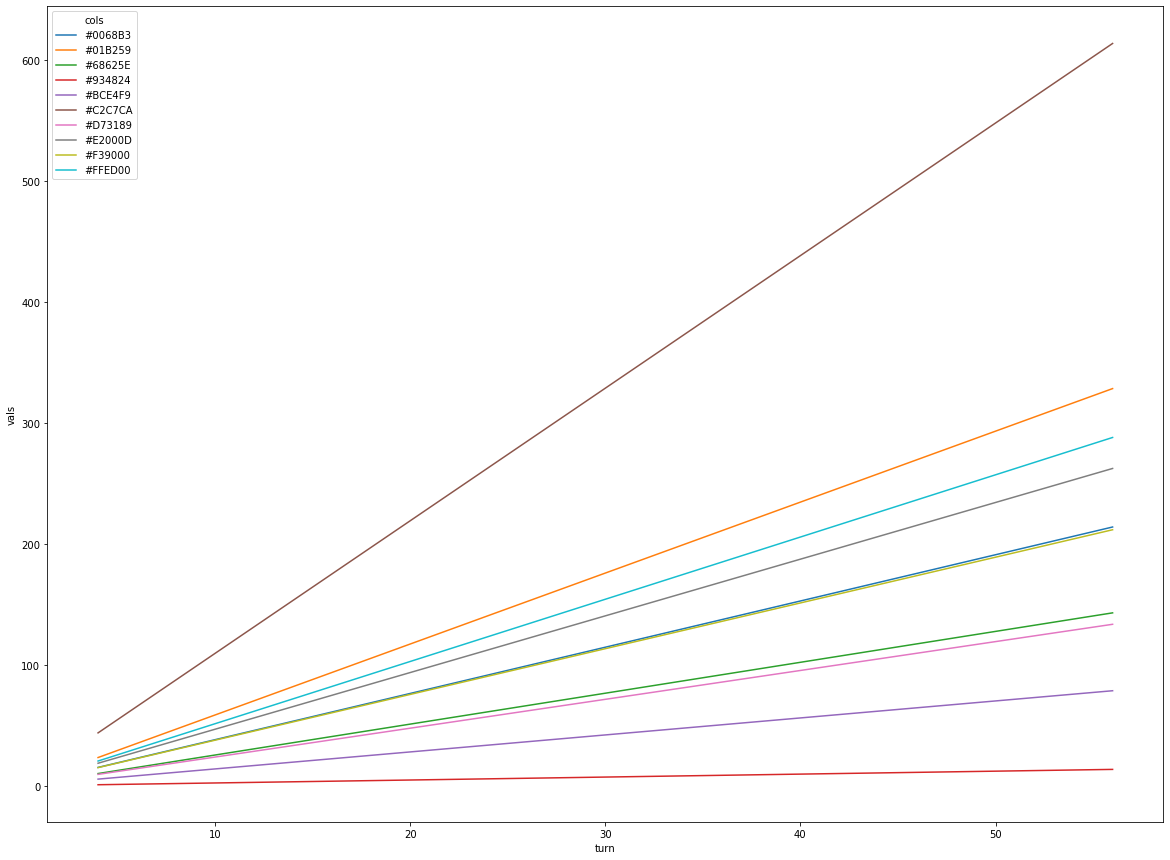

In [77]:
new = df_rents.melt('turn', var_name='cols', value_name='vals')

ax = sns.lineplot(x='turn', y='vals', hue='cols', data=new)